# 归一化/标准化

本文主要帮助了解机器学习中常见的前处理问题 -- 归一化/标准化。主要参考了以下资料：

- [标准化和归一化什么区别？-- thothsun回答](https://www.zhihu.com/question/20467170/answer/839255695)
- [标准化和归一化什么区别？-- 龚焱回答](https://www.zhihu.com/question/20467170/answer/392949674)
- [标准化和归一化，请勿混为一谈，透彻理解数据变换](https://blog.csdn.net/weixin_36604953/article/details/102652160)
- [[机器学习] 数据特征 标准化和归一化](https://blog.csdn.net/zwqjoy/article/details/81182102)
- [Scale, Standardize, or Normalize with Scikit-Learn](https://t.co/GLJKYsAsL4?amp=1)
- [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

归一化/标准化实际上是指特征工程中的特征缩放过程，由于中文翻译的原因，网上对它们的解释也是五花八门，但其实不考虑它们的名字，直接看它们的作用和操作方法，可能会更容易理解。

使用特征缩放的作用是：

1. 使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确。
2. 加快学习算法的收敛速度。

参考[sklearn的官方文档](https://scikit-learn.org/stable/)的数据预处理章节，[5.3. Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html) 以及 [Feature scaling - Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

"标准化"和"归一化"这两个中文词主要指代四种Feature scaling(特征缩放)方法：

1. Rescaling (min-max normalization)—— MinMaxScaler() 缩放到指定的min和max之间（可以指定min和max值），比如默认的 0 到 1 之间 ![](img/v2-1874c0fd4801124ad29d6b2ff5d78d56_720w.jpg)
2. Mean normalization 缩放到-1到1的范围，没看到sklearn中有直接的对应方法![](img/v2-1232fae014a02e150ed2b78e463a16ce_720w.jpg)
3. Standardization (Z-score Normalization)—— StandardScaler() ![](img/v2-9734f7841b544443b591bfbf54a7f041_720w.png)
4. Scaling to unit length —— Normalizer() ,缩放到0和1之间，保留原始数据的分布 ![](img/v2-ca8f8c4e0c60572bc2f0ecce563f006e_720w.png)

举个例子来看看它们之间的区别，假设一个数据集包括「身高」和「体重」两个特征，它们都满足正态分布，画出原始数据图像为：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import os

def plot(data, title):
    sns.set_style('dark')
    f, ax = plt.subplots()
    ax.set(ylabel='frequency')
    ax.set(xlabel='height(blue) / weight(green)')
    ax.set(title=title)
    sns.distplot(data[:, 0:1], color='blue')
    sns.distplot(data[:, 1:2], color='green')
    plt.savefig(os.path.join("img", title + '.png'))

np.random.seed(42)
height = np.random.normal(loc=168, scale=5, size=1000).reshape(-1, 1)
weight = np.random.normal(loc=70, scale=10, size=1000).reshape(-1, 1)

C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


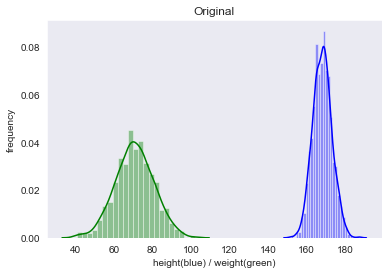

In [2]:
original_data = np.concatenate((height, weight), axis=1)
plot(original_data, 'Original')

使用 MinMaxScaler()缩放，结果为：

C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


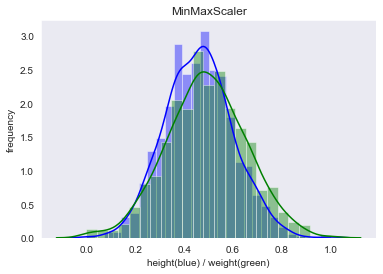

In [3]:
min_max_scaler_data = preprocessing.MinMaxScaler().fit_transform(original_data)
plot(min_max_scaler_data, 'MinMaxScaler')

使用 StandardScaler()缩放，结果为：

C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


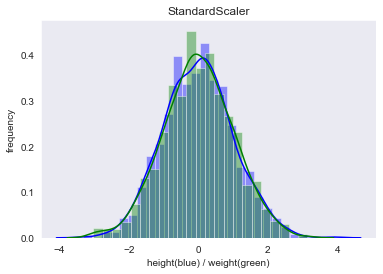

In [4]:
standard_scaler_data = preprocessing.StandardScaler().fit_transform(original_data)
plot(standard_scaler_data, 'StandardScaler')

使用 Normalizer()缩放，结果为：

C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


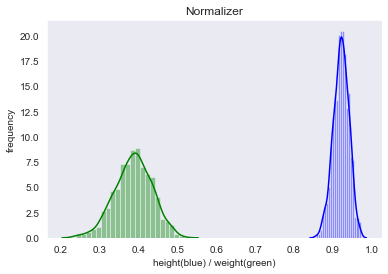

In [5]:
normalizer_data = preprocessing.Normalizer().fit_transform(original_data)
plot(normalizer_data, 'Normalizer')

sklearn中还有其他的缩放方法，就不一一记录了，比如RobustScaler结果：

C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


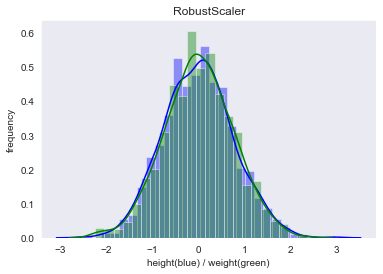

In [6]:
robust_scaler_data = preprocessing.RobustScaler().fit_transform(original_data)
plot(robust_scaler_data, 'RobustScaler')

![](img/1_z-C9ANBC4rjsk-ZK4wzijg.png)

总结下，一般归一化是指将每个输入变量分别缩放到范围 0-1；标准化则是通过减去均值（称为中心化）并除以标准差来分别调整每个输入变量，以将分布移动到均值为零和标准差为 1 的分布，标准化假设观察符合具有良好均值和标准差的高斯分布（钟形曲线）。如果未满足此期望，仍然可以标准化您的数据，但可能无法获得可靠的结果，所以还会有一些其他变换到正态分布的运算，比如cox-box变换等。

一般来说，如果数据分布是正态的，可以直接标准化，如果不是，可以转换后再标准化；如果对数据分布是有疑问的，则一般归一化更常用一些，当然如果条件允许，可以都试一试；也可以先标准化，然后再归一化。没有最好的方式，根据自己的实际情况，多尝试来判断。